# Import liberaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.metrics import plot_confusion_matrix

import seaborn as sn
from sklearn.model_selection import train_test_split

from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

from sklearn.ensemble import StackingClassifier
from sklearn.base import clone

import pickle

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Evaluate the model

In [ ]:
def model_Evaluate(model,X_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    #Print the evaluation metrics for the dataset.
    f1=f1_score(y_test, y_pred, average='weighted')
    print("the weighted f1_score:",f1)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test,y_test, values_format='d')
    plt.show()
    #plot_multiclass_roc(model, X_test, y_test,figsize=(8, 6))
    return f1

# Draw roc curve

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, figsize=(8, 6)):
        n_classes=3
        y_score = clf.decision_function(X_test)

        # structures
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # calculate dummies once
        y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # roc for each class
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver operating characteristic example')
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        plt.show()

# plot data

In [ ]:
def plotdata(data):
    pca = PCA(  n_components=2  )
    Data_2D = pca.fit_transform(  data   )
    plt.scatter( Data_2D[:,0] , Data_2D[:,1] ,cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show(  )

# Read data

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/data_textblob.csv')

In [ ]:
df['class'].value_counts()

neutral     625144
positive    623317
negative    339644
Name: class, dtype: int64

In [ ]:
df.shape

(1588105, 3)

# seperate text & sentiment

In [ ]:
text =df['clean_text'] 

In [ ]:
sentiment=df['class'] 

**split the data**

In [ ]:
X_train_split , X_test_split , y_train , y_test = train_test_split(text , sentiment , train_size = 0.8 , test_size = 0.2 , random_state = 0)


In [ ]:
print('xtrain : ',len(X_train_split),' xtest : ',len(X_test_split))

xtrain :  1270484  xtest :  317621


In [ ]:
y_train.value_counts()

neutral     499932
positive    498871
negative    271681
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

neutral     125212
positive    124446
negative     67963
Name: class, dtype: int64

In [ ]:
dff=pd.DataFrame({'clean_text':X_train_split,'class':y_train})
g = dff.groupby('class')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
g['class'].value_counts()
y_train=g['class']
X_train_split=g['clean_text']

In [ ]:
g['class'].value_counts()

positive    271681
negative    271681
neutral     271681
Name: class, dtype: int64

# Feature Extraction

In [ ]:
############### Bow and TF_IDF function #############
def Tf_Idf(   text ):
    Incoder = TfidfVectorizer(ngram_range=(1,1))
    Incoder.fit(text)
    TF_IDF_text = Incoder.transform(text)
    pickle.dump(Incoder, open('/content/drive/MyDrive/Tf_Idf.P','wb'))



In [ ]:
############### bigram #############
def bi_gram(   text ):
    Incoder = TfidfVectorizer(ngram_range=(1,2))
    Incoder.fit(text)
    bigram_text = Incoder.transform(text)
    pickle.dump(Incoder, open('/content/drive/MyDrive/bigram.P','wb'))

In [ ]:
############### Trigram #############
def tri_gram(   text ):
    Incoder = TfidfVectorizer(ngram_range=(1,3))
    Incoder.fit(text)
    trigram_text = Incoder.transform(text)
    pickle.dump(Incoder, open('/content/drive/MyDrive/trigram.P','wb'))

In [ ]:
tfidf=Tf_Idf(X_train_split )
bigram=bi_gram(X_train_split )
trigram=tri_gram(X_train_split)

In [ ]:
############### lda #############
def lda(text) :
  count_vect = pickle.load( open('/content/drive/MyDrive/count_vect', "rb" ) )
  X_train_counts = count_vect.transform( text )

  LDA = LatentDirichletAllocation( n_components=3,random_state=42 )
  LDA.fit(X_train_counts)
  X_train_LDA = LDA.transform(X_train_counts)
  pickle.dump(LDA, open('/content/drive/MyDrive/lda.P','wb'))
  pickle.load( open('/content/drive/MyDrive/count_vect', "rb" ) )


In [ ]:
count_vect =CountVectorizer()
X_train_counts = count_vect.fit( X_train_split )
pickle.dump( count_vect,  open('/content/drive/MyDrive/count_vect','wb'))
count_vect=pickle.load( open('/content/drive/MyDrive/count_vect', "rb" ) )
X_train_counts = count_vect.transform( X_train_split )

TypeError: ignored

In [ ]:
print(X_train_counts.shape)

(815043, 276238)


In [ ]:
LDA = LatentDirichletAllocation( n_components=3,random_state=0 )
LDA.fit(X_train_counts)
X_train_LDA = LDA.transform(X_train_counts)
pickle.dump(LDA, open('/content/drive/MyDrive/lda.P','wb'))

In [ ]:
print(X_train_LDA.shape)

(815043, 3)


In [ ]:
c= pickle.load( open('/content/drive/MyDrive/count_vect', "rb" ) )

In [ ]:
c

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
llda= pickle.load( open('/content/drive/MyDrive/lda.P', "rb" ) )

In [ ]:
llda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
LDA= pickle.load( open( "/content/drive/MyDrive/lda.P", "rb" ) )
X_train=LDA.transform(X_train_split)
X_test=LDA.transform(X_test_split)

ValueError: ignored

In [ ]:
def build_modellda(model):
    print('##################',model, 'with lda ##################' )
    
    LDA= pickle.load( open( "/content/drive/MyDrive/lda.P", "rb" ) )
    X_train=LDA.transform(X_train_split)
    X_test=LDA.transform(X_test_split)
    print("the size of X_train :  ",X_train.shape )
    print("the size of X_test :  ",X_test.shape )
    if model=='svm':
        model = LinearSVC()
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    if model=='lr':
        model = LogisticRegression( n_jobs=-1)
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    if model=='nb':
        model = MultinomialNB()
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    return f1

In [ ]:
from sklearn.naive_bayes import MultinomialNB
models=['svm','lr','nb']
possible_models=[]
f1=[]
for model in models:
      possible_models.append(str(model)+'_lda')
      f1.append(build_modellda(model))

################## svm with lda ##################


ValueError: ignored

################## nb with tf-idf 4 -gram ##################
the size of X_train :   (815043, 276218)
the size of X_test :   (317621, 276218)
the weighted f1_score: 0.8353040213382896
              precision    recall  f1-score   support

    negative       0.68      0.90      0.78     67963
     neutral       0.97      0.74      0.84    125212
    positive       0.84      0.89      0.86    124446

    accuracy                           0.83    317621
   macro avg       0.83      0.84      0.83    317621
weighted avg       0.86      0.83      0.84    317621



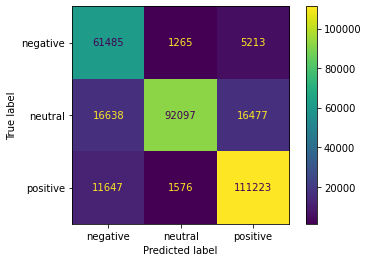

In [ ]:
from sklearn.naive_bayes import MultinomialNB
models=['nb']
possible_models=[]
f1=[]
for model in models:
      possible_models.append(str(model)+'_lda')
      f1.append(build_modellda(model,4))

In [ ]:
LDA=pickle.load( open( "/content/drive/MyDrive/lda.P", "rb" ) )

In [ ]:
X_train = LDA.transform(X_train_split)

In [ ]:
X_train.shape

(815043, 276218)

In [ ]:
X_train

<815043x276218 sparse matrix of type '<class 'numpy.float64'>'
	with 5087055 stored elements in Compressed Sparse Row format>

In [ ]:
  LDA=lda(X_train_split)

**Build models**

In [ ]:
def build_model(model,word):
    print('##################',model, 'with tf-idf',word,'-gram','##################' )
    if word==1:
          tfidf= pickle.load( open( "/content/drive/MyDrive/Tf_Idf.P", "rb" ) )
          X_train=tfidf.transform(X_train_split)
          X_test=tfidf.transform(X_test_split)
    elif word==2:
          bigram= pickle.load( open( "/content/drive/MyDrive/bigram.P", "rb" ) )
          X_train=bigram.transform(X_train_split)
          X_test=bigram.transform(X_test_split)
    elif word==3:
          trigram= pickle.load( open( "/content/drive/MyDrive/trigram.P", "rb" ) )
          X_train=trigram.transform(X_train_split)
          X_test=trigram.transform(X_test_split)
    print("the size of X_train :  ",X_train.shape )
    print("the size of X_test :  ",X_test.shape )
    if model=='svm':
        model = LinearSVC()
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    if model=='lr':
        model = LogisticRegression( n_jobs=-1)
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    return f1

################## svm with tf-idf 1 -gram ##################
the size of X_train :   (815043, 276218)
the size of X_test :   (317621, 276218)
the weighted f1_score: 0.9848342226675584
              precision    recall  f1-score   support

    negative       0.95      0.99      0.97     67963
     neutral       1.00      0.98      0.99    125212
    positive       0.99      0.98      0.99    124446

    accuracy                           0.98    317621
   macro avg       0.98      0.99      0.98    317621
weighted avg       0.99      0.98      0.98    317621



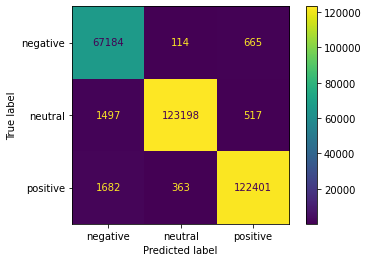

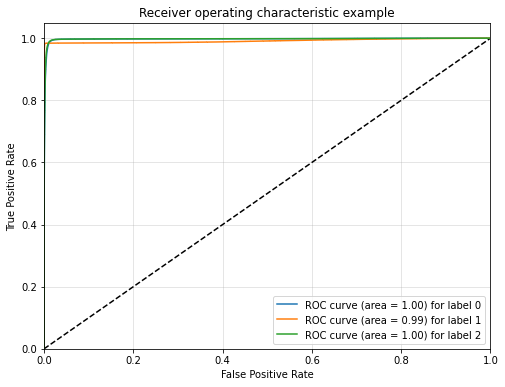

################## svm with tf-idf 2 -gram ##################
the size of X_train :   (815043, 2766644)
the size of X_test :   (317621, 2766644)
the weighted f1_score: 0.9844206914331357
              precision    recall  f1-score   support

    negative       0.95      0.99      0.97     67963
     neutral       1.00      0.99      0.99    125212
    positive       0.99      0.98      0.99    124446

    accuracy                           0.98    317621
   macro avg       0.98      0.98      0.98    317621
weighted avg       0.98      0.98      0.98    317621



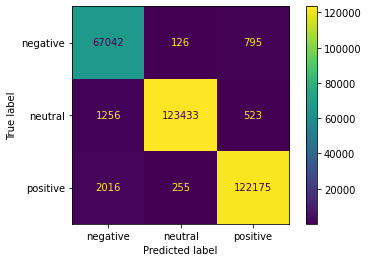

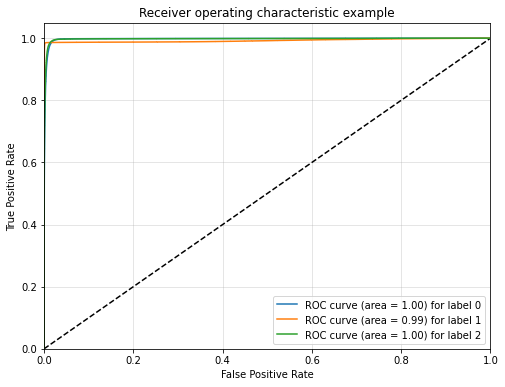

################## svm with tf-idf 3 -gram ##################
the size of X_train :   (815043, 6168783)
the size of X_test :   (317621, 6168783)
the weighted f1_score: 0.9827427650769354
              precision    recall  f1-score   support

    negative       0.95      0.98      0.97     67963
     neutral       1.00      0.99      0.99    125212
    positive       0.99      0.98      0.98    124446

    accuracy                           0.98    317621
   macro avg       0.98      0.98      0.98    317621
weighted avg       0.98      0.98      0.98    317621



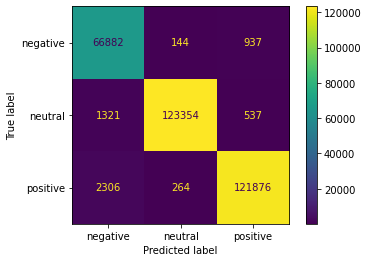

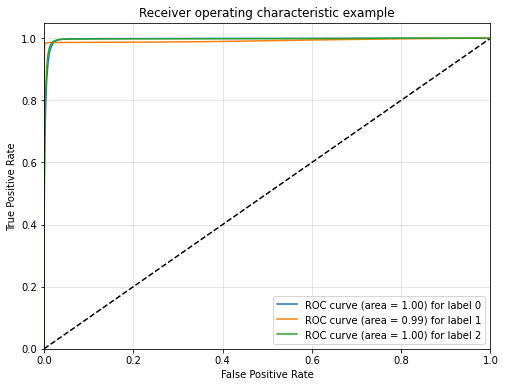

################## lr with tf-idf 1 -gram ##################
the size of X_train :   (815043, 276218)
the size of X_test :   (317621, 276218)
the weighted f1_score: 0.9773354871565509
              precision    recall  f1-score   support

    negative       0.95      0.98      0.96     67963
     neutral       0.98      0.98      0.98    125212
    positive       0.99      0.97      0.98    124446

    accuracy                           0.98    317621
   macro avg       0.97      0.98      0.98    317621
weighted avg       0.98      0.98      0.98    317621



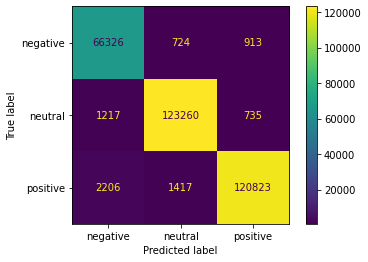

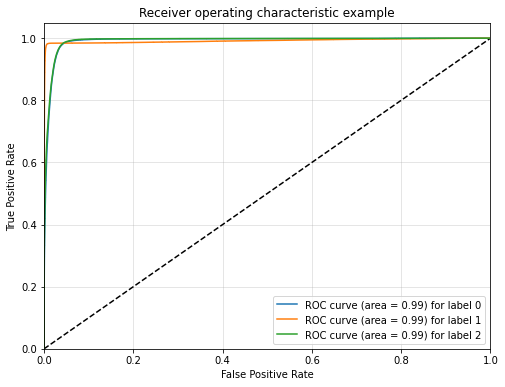

################## lr with tf-idf 2 -gram ##################
the size of X_train :   (815043, 2766644)
the size of X_test :   (317621, 2766644)
the weighted f1_score: 0.9752064963678975
              precision    recall  f1-score   support

    negative       0.94      0.97      0.96     67963
     neutral       0.98      0.98      0.98    125212
    positive       0.99      0.97      0.98    124446

    accuracy                           0.98    317621
   macro avg       0.97      0.97      0.97    317621
weighted avg       0.98      0.98      0.98    317621



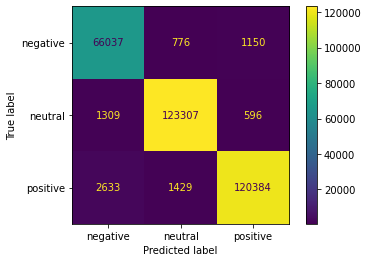

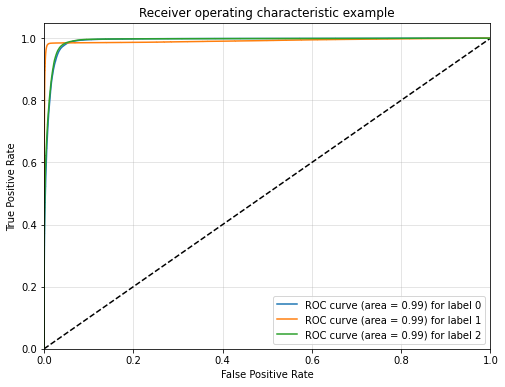

################## lr with tf-idf 3 -gram ##################
the size of X_train :   (815043, 6168783)
the size of X_test :   (317621, 6168783)
the weighted f1_score: 0.972668953653931
              precision    recall  f1-score   support

    negative       0.94      0.97      0.95     67963
     neutral       0.98      0.98      0.98    125212
    positive       0.98      0.97      0.97    124446

    accuracy                           0.97    317621
   macro avg       0.97      0.97      0.97    317621
weighted avg       0.97      0.97      0.97    317621



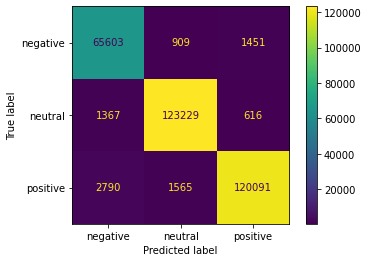

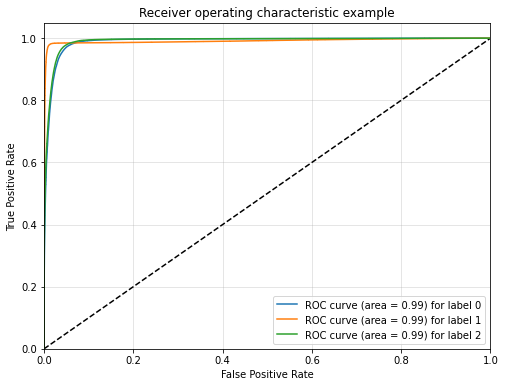

In [ ]:
models=['svm','lr']
possible_models=[]
f1=[]
f1_svm=[]
f1_lr=[]
for model in models:
    for i in range(1,4):
        possible_models.append(str(model)+'_'+str(i)+'-gram')
        f1.append(build_model(model,i)) 

In [ ]:
df=pd.DataFrame({'model':possible_models,'f1':f1})
print(df)
f1_svm=f1[:len(f1)//2]
svm=possible_models[:len(f1)//2]
best=np.argmax(f1_svm)
print(svm[best])
f1_lr=f1[len(f1)//2:]
best=np.argmax(f1_lr)
lr=possible_models[len(f1)//2:]
print(lr[best])

        model        f1
0  svm_1-gram  0.984834
1  svm_2-gram  0.984421
2  svm_3-gram  0.982743
3   lr_1-gram  0.977335
4   lr_2-gram  0.975206
5   lr_3-gram  0.972669
svm_1-gram
lr_1-gram


In [ ]:
df

,model,f1
0,svm_1-gram,0.984834
1,svm_2-gram,0.984421
2,svm_3-gram,0.982743
3,lr_1-gram,0.977335
4,lr_2-gram,0.975206
5,lr_3-gram,0.972669


In [ ]:
def build_nb(model,word):
    print('##################',model, 'with tf-idf',word,'-gram','##################' )
    if word==1:
          tfidf= pickle.load( open( "/content/drive/MyDrive/Tf_Idf.P", "rb" ) )
          X_train=tfidf.transform(X_train_split)
          X_test=tfidf.transform(X_test_split)
    elif word==2:
          bigram= pickle.load( open( "/content/drive/MyDrive/bigram.P", "rb" ) )
          X_train=bigram.transform(X_train_split)
          X_test=bigram.transform(X_test_split)
    elif word==3:
          trigram= pickle.load( open( "/content/drive/MyDrive/trigram.P", "rb" ) )
          X_train=trigram.transform(X_train_split)
          X_test=trigram.transform(X_test_split)
    print("the size of X_train :  ",X_train.shape )
    print("the size of X_test :  ",X_test.shape )
    if model=='nb':
        model = MultinomialNB()
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    return f1

################## nb with tf-idf 1 -gram ##################
the size of X_train :   (815043, 276218)
the size of X_test :   (317621, 276218)
the weighted f1_score: 0.8367833448616921
              precision    recall  f1-score   support

    negative       0.69      0.91      0.78     67963
     neutral       0.97      0.74      0.84    125212
    positive       0.84      0.89      0.87    124446

    accuracy                           0.84    317621
   macro avg       0.83      0.85      0.83    317621
weighted avg       0.86      0.84      0.84    317621



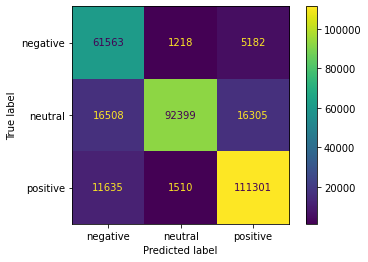

################## nb with tf-idf 2 -gram ##################
the size of X_train :   (815043, 2766644)
the size of X_test :   (317621, 2766644)
the weighted f1_score: 0.8566065501750139
              precision    recall  f1-score   support

    negative       0.79      0.86      0.83     67963
     neutral       0.96      0.77      0.86    125212
    positive       0.82      0.94      0.87    124446

    accuracy                           0.86    317621
   macro avg       0.86      0.86      0.85    317621
weighted avg       0.87      0.86      0.86    317621



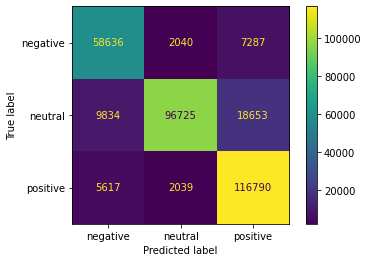

################## nb with tf-idf 3 -gram ##################
the size of X_train :   (815043, 6168783)
the size of X_test :   (317621, 6168783)
the weighted f1_score: 0.8605003974634658
              precision    recall  f1-score   support

    negative       0.87      0.78      0.82     67963
     neutral       0.94      0.81      0.87    125212
    positive       0.80      0.96      0.87    124446

    accuracy                           0.86    317621
   macro avg       0.87      0.85      0.85    317621
weighted avg       0.87      0.86      0.86    317621



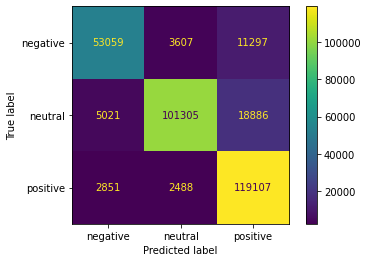

In [ ]:
from sklearn.naive_bayes import GaussianNB
models=['nb']
possible_models=[]
f1=[]
for model in models:
    for i in range(1,4):
        possible_models.append(str(model)+'_'+str(i)+'-gram')
        f1.append(build_nb(model,i)) 

In [ ]:
df=pd.DataFrame({'model':possible_models,'f1':f1})
print(df)

       model        f1
0  nb_1-gram  0.836783
1  nb_2-gram  0.856607
2  nb_3-gram  0.860500


In [ ]:
df

,model,f1
0,nb_1-gram,0.836783
1,nb_2-gram,0.856607
2,nb_3-gram,0.860500


In [ ]:
def build_xg(model,word):
    print('##################',model, 'with tf-idf',word,'-gram','##################' )
    if word==1:
          tfidf= pickle.load( open( "/content/drive/MyDrive/Tf_Idf.P", "rb" ) )
          X_train=tfidf.transform(X_train_split)
          X_test=tfidf.transform(X_test_split)
    elif word==2:
          bigram= pickle.load( open( "/content/drive/MyDrive/bigram.P", "rb" ) )
          X_train=bigram.transform(X_train_split)
          X_test=bigram.transform(X_test_split)
    elif word==3:
          trigram= pickle.load( open( "/content/drive/MyDrive/trigram.P", "rb" ) )
          X_train=trigram.transform(X_train_split)
          X_test=trigram.transform(X_test_split)
    print("the size of X_train :  ",X_train.shape )
    print("the size of X_test :  ",X_test.shape )
    if model=='xg':
        model = xgb.XGBClassifier()
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    return f1

################## xg with tf-idf 1 -gram ##################
the size of X_train :   (815043, 276218)
the size of X_test :   (317621, 276218)
the weighted f1_score: 0.7792729529547715
              precision    recall  f1-score   support

    negative       0.84      0.66      0.74     67963
     neutral       0.69      0.99      0.81    125212
    positive       0.96      0.65      0.77    124446

    accuracy                           0.78    317621
   macro avg       0.83      0.76      0.77    317621
weighted avg       0.82      0.78      0.78    317621



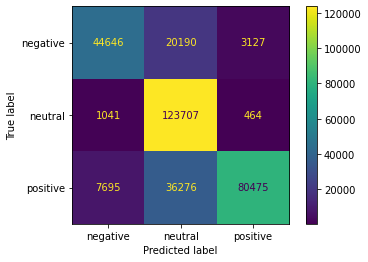

################## xg with tf-idf 2 -gram ##################
the size of X_train :   (815043, 2766644)
the size of X_test :   (317621, 2766644)
the weighted f1_score: 0.79069057157977
              precision    recall  f1-score   support

    negative       0.89      0.65      0.75     67963
     neutral       0.69      0.99      0.81    125212
    positive       0.95      0.68      0.79    124446

    accuracy                           0.79    317621
   macro avg       0.84      0.77      0.78    317621
weighted avg       0.84      0.79      0.79    317621



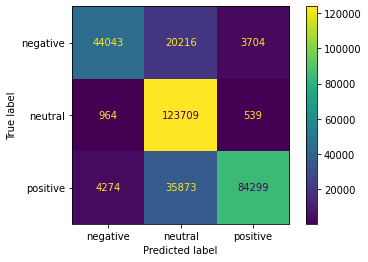

################## xg with tf-idf 3 -gram ##################
the size of X_train :   (815043, 6168783)
the size of X_test :   (317621, 6168783)
the weighted f1_score: 0.7909472767615952
              precision    recall  f1-score   support

    negative       0.90      0.64      0.75     67963
     neutral       0.69      0.99      0.81    125212
    positive       0.95      0.68      0.79    124446

    accuracy                           0.79    317621
   macro avg       0.84      0.77      0.78    317621
weighted avg       0.84      0.79      0.79    317621



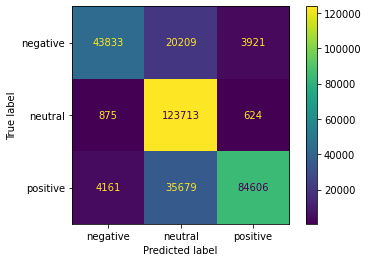

In [ ]:
import xgboost as xgb
models=['xg']
possible_models=[]
f1=[]
for model in models:
    for i in range(1,4):
        possible_models.append(str(model)+'_'+str(i)+'-gram')
        f1.append(build_xg(model,i)) 

In [ ]:
tfidf=Tf_Idf(X_train_split )

In [ ]:
tfidf= pickle.load( open( "/content/drive/MyDrive/Tf_Idf.P", "rb" ) )
X_train=tfidf.transform(X_train_split)
X_test=tfidf.transform(X_test_split)
f1=[]
rs = 0
estimators = [LinearSVC(), LogisticRegression()]
estimators = {estimator.__class__.__name__: estimator for estimator in estimators}

#Stacking (Aggregator svm)
stacking1 = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], SVC(), n_jobs=-1)
stacking1.fit(X_train, y_train)
predY = stacking1.predict(X_test)
f1.append(accuracy_score(y_test, predY))


#Stacking(Aggregator lr)
"""stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], LogisticRegression(), n_jobs=-1)
stacking.fit(X_train, y_train)
predY = stacking.predict(X_test)
f1.append(accuracy_score(y_test, predY))"""


print(f1)
#the highest score
index=np.argmax(f1)
finalscore=f1[index]
print("the heighest stacking score is : ",finalscore)

[0.9868113254476247]
the heighest stacking score is :  0.9868113254476247


the weighted f1_score: 0.9867682084841153
              precision    recall  f1-score   support

    negative       0.96      0.99      0.97     67963
     neutral       1.00      0.98      0.99    125212
    positive       0.99      0.99      0.99    124446

    accuracy                           0.99    317621
   macro avg       0.98      0.99      0.98    317621
weighted avg       0.99      0.99      0.99    317621



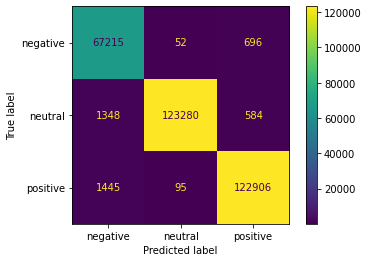

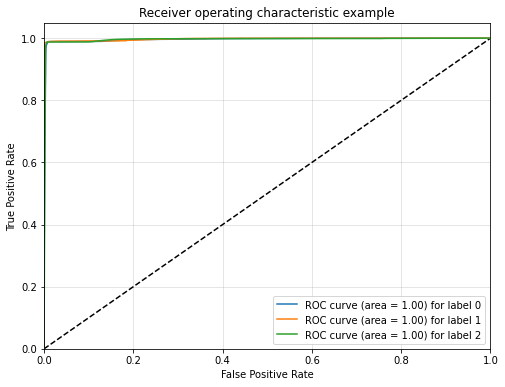

0.9867682084841153

In [ ]:
X_test=tfidf.transform(X_test_split)

model_Evaluate(stacking1,X_test)

the weighted f1_score: 0.9855793543773098
              precision    recall  f1-score   support

    negative       0.96      0.99      0.97     67963
     neutral       0.99      0.99      0.99    125212
    positive       0.99      0.98      0.99    124446

    accuracy                           0.99    317621
   macro avg       0.98      0.99      0.98    317621
weighted avg       0.99      0.99      0.99    317621



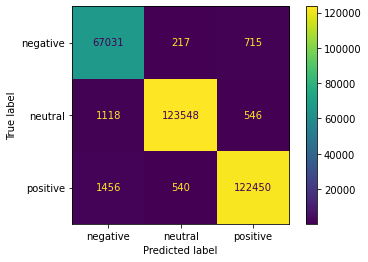

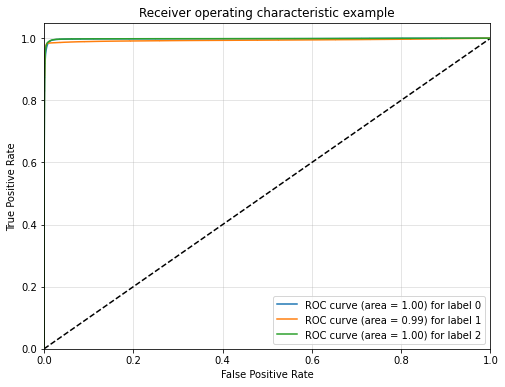

0.9855793543773098

In [ ]:

model_Evaluate(stacking,X_test)

In [ ]:
1+1

In [ ]:
doc=['/content/drive/MyDrive/BMW.csv']

In [ ]:
Tfidf = pickle.load( open( "/content/drive/MyDrive/Tf_Idf.P", "rb" ) )

In [ ]:
df=pd.DataFrame({'model':possible_models,'f1':f1})
f1_svm=f1[:len(f1)//2]
svm=possible_models[:len(f1)//2]
best=np.argmax(f1_svm)
print(svm[best])
f1_lr=f1[len(f1)//2:]
best=np.argmax(f1_lr)
lr=possible_models[len(f1)//2:]
print(lr[best])

In [ ]:
df

,model,f1
0,svm_1-gram,0.986499
1,svm_2-gram,0.986678
2,svm_3-gram,0.985072
3,lr_1-gram,0.977862
4,lr_2-gram,0.972805
5,lr_3-gram,0.973648


In [ ]:
f1_svm=f1[:len(f1)//2]

In [ ]:
f1_svm

[0.9864985764729336, 0.9866783848962452, 0.9850723869913256]

In [ ]:
svm=possible_models[:len(f1)//2]

In [ ]:
best=np.argmax(f1_svm)

In [ ]:
print(svm[best])

svm_2-gram


In [ ]:
f1_lr=f1[len(f1)//2:]

In [ ]:
f1_lr

[0.9778622286127739, 0.9728047308567159, 0.9736475740472686]

In [ ]:
best=np.argmax(f1_lr)
lr=possible_models[len(f1)//2:]
print(lr[best])

In [ ]:
lr=possible_models[len(f1)//2:]

In [ ]:
print(lr[best])

lr_1-gram


In [ ]:
Tfidf = pickle.load( open( "Tfidf.p", "rb" ) )

# Ensemble model

In [ ]:
def build_model(model,word):
    print('##################',model, 'with tf-idf',word,'-gram','##################' )
    if word==1:
          tfidf= pickle.load( open( "/content/sample_data/Tf_Idf.P", "rb" ) )
          X_train=tfidf.transform(X_train_split)
          X_test=tfidf.transform(X_test_split)
    elif word==2:
          bigram= pickle.load( open( "/content/sample_data/bigram.P", "rb" ) )
          X_train=bigram.transform(X_train_split)
          X_test=bigram.transform(X_test_split)
    elif word==3:
          trigram= pickle.load( open( "/content/sample_data/trigram.P", "rb" ) )
          X_train=trigram.transform(X_train_split)
          X_test=trigram.transform(X_test_split)
    print("the size of X_train :  ",X_train.shape )
    print("the size of X_test :  ",X_test.shape )
    if model=='svm':
        model = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], SVC(), n_jobs=-1)
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    if model=='lr':
        model = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], SVC(), n_jobs=-1)
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    return f1

In [ ]:
def build_Ensemble(model,word):
    print('##################',model, 'with tf-idf',word,'-gram','##################' )
    Incoder = TfidfVectorizer(ngram_range=(1,word))
    Incoder.fit(X_train_split)
    X_train = Incoder.transform(X_train_split)
    print("the size of X_train :  ",X_train.shape )
    X_test=Incoder.transform( X_test_split )
    print("the size of X_test :  ",X_test.shape )
    if model=='svm':
        model = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], SVC(), n_jobs=-1)
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    if model=='lr':
        model = LogisticRegression( n_jobs=-1)
        model.fit(X_train, y_train)
        f1=model_Evaluate(model,X_test)
    return f1

In [ ]:

f1=[]
rs = 0
estimators = [LinearSVC(), LogisticRegression()]
estimators = {estimator.__class__.__name__: estimator for estimator in estimators}

#Stacking (Aggregator svm)
stacking1 = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], SVC(), n_jobs=-1)
stacking1.fit(X_train, y_train)
predY = stacking1.predict(X_test)
f1.append(accuracy_score(y_test, predY))


#Stacking(Aggregator lr)
stacking = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], LogisticRegression(), n_jobs=-1)
stacking.fit(X_train, y_train)
predY = stacking.predict(X_test)
f1.append(accuracy_score(y_test, predY))


print(f1)
#the highest score
index=np.argmax(f1)
finalscore=f1[index]
print("the heighest stacking score is : ",finalscore)

[0.9871090893923558, 0.984954879359331]
the heighest stacking score is :  0.9871090893923558


In [ ]:
df=pd.DataFrame({'model':['stacking(Aggregator svm)' ,'stacking(Aggregator lr)' ] ,'f1':[0.9871090893923558, 0.984954879359331]})

In [ ]:
df

,model,f1
0,stacking(Aggregator svm),0.987109
1,stacking(Aggregator lr),0.984955


Accuracy: 0.9871090893923558
              precision    recall  f1-score   support

    negative       0.98      0.99      0.98     67811
     neutral       1.00      0.99      0.99     68230
    positive       0.98      0.99      0.99     67746

    accuracy                           0.99    203787
   macro avg       0.99      0.99      0.99    203787
weighted avg       0.99      0.99      0.99    203787



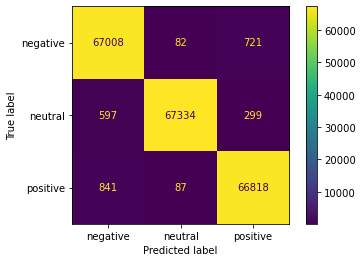

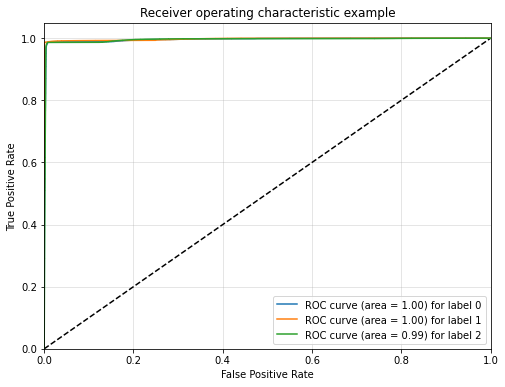

In [ ]:
model_Evaluate(stacking1)

Accuracy: 0.984954879359331
              precision    recall  f1-score   support

    negative       0.98      0.99      0.98     67811
     neutral       0.99      0.99      0.99     68230
    positive       0.99      0.98      0.98     67746

    accuracy                           0.98    203787
   macro avg       0.98      0.98      0.98    203787
weighted avg       0.98      0.98      0.98    203787



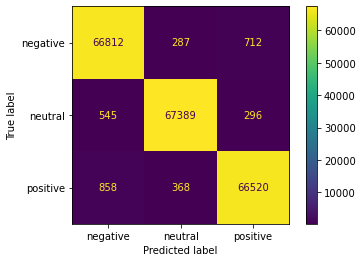

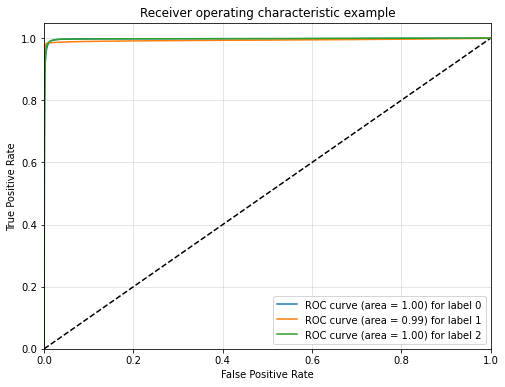

In [ ]:
model_Evaluate(stacking)

In [ ]:
pickle.dump(stacking1, open('stacking1.P','wb'))